### **Chapter 02. KMeans 클래스**

In [2]:
import numpy as np

fruits = np.load("fruits.npy")
print(fruits.shape)

(1470, 100, 100)


In [3]:
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

(1470, 10000)


In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, # The number of clusters (기본값=8)
            init="random", # initialize: 초기화하다
                  # option 1: "random" -> 센트로이드 위치를 랜덤하게 설정
                  # option 2: "k-means++" -> 센트로이드 위치를 smart한 방식으로 설정
            random_state=42)

km.fit(fruits_2d) # 비지도 학습이라 y값이 없음! x값만!

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=3, random_state=42)

In [6]:
print(km.labels_)
print(km.labels_.shape)

[1 1 1 ... 1 1 1]
(1470,)


In [7]:
print(np.unique(km.labels_))

[0 1 2]


In [8]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([490, 735, 245], dtype=int64))


In [11]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    
    # 행
    rows = int(np.ceil(n / 10)) # 올림
    if rows == 1:
        cols = n # 열
    else:
        cols = 10      
    
    plt.figure(figsize=(cols * ratio, rows * ratio)) # (가로, 세로)

    for j in range(0, rows, 1):
        for k in range(0, cols, 1):
            index = j * 10 + k
            if index < n:
                plt.subplot(rows, cols, index + 1) # subplot은 1부터 시작하기 때문에 +1 해준다
                plt.imshow(arr[index, :, :], cmap="gray_r")
                plt.axis("off")

    plt.show()

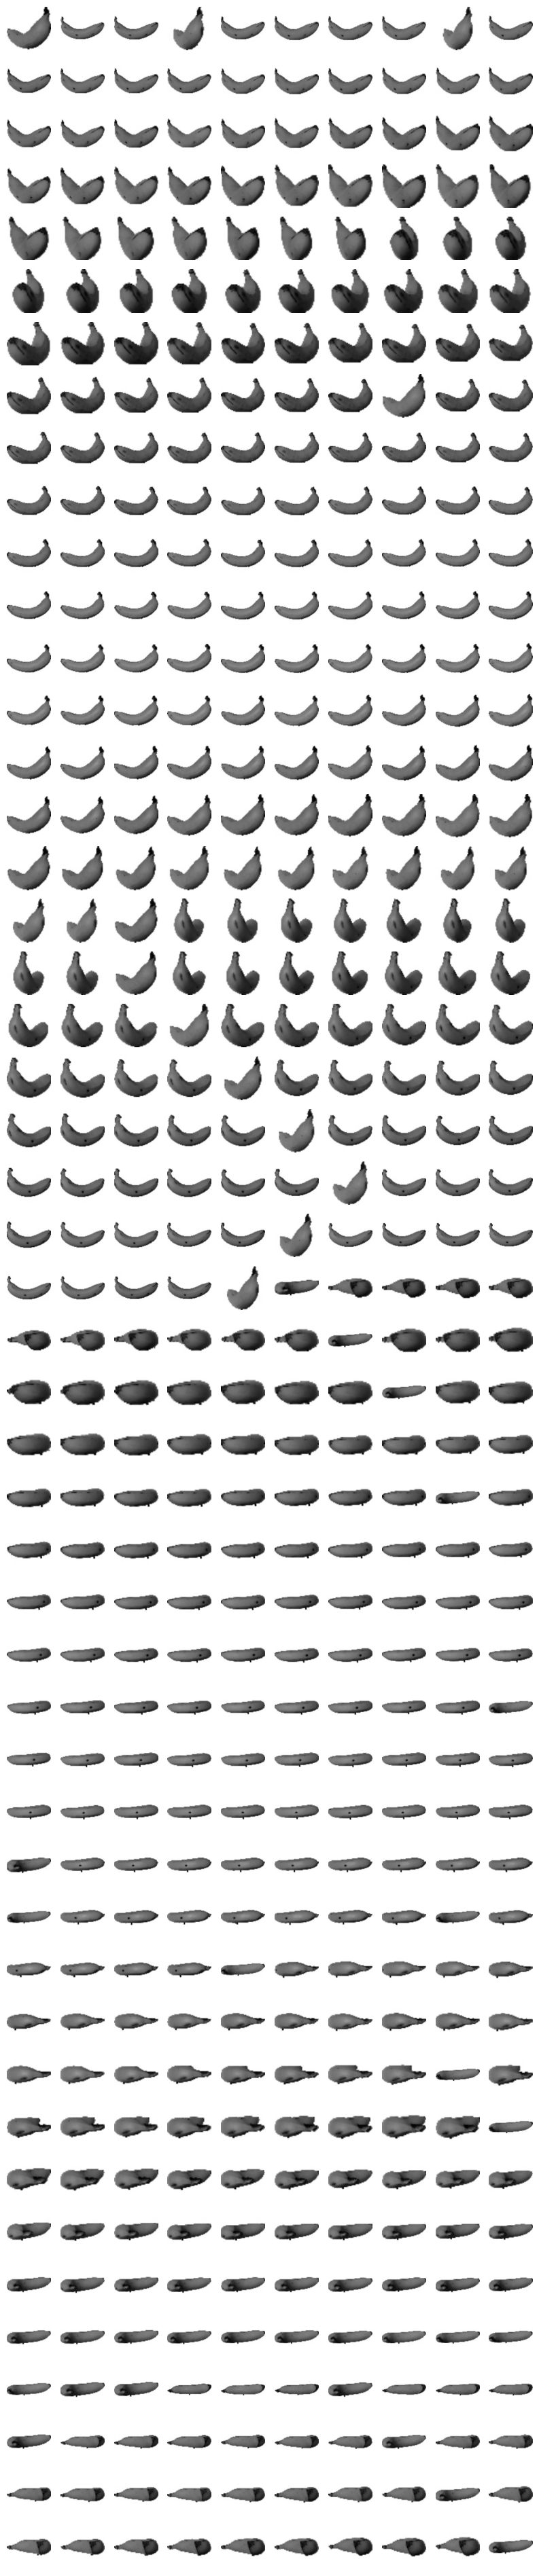

In [12]:
mask = (km.labels_ == 0) # 490 --> banana
#cluster0 = km.labels_[mask]
draw_fruits(fruits[mask])

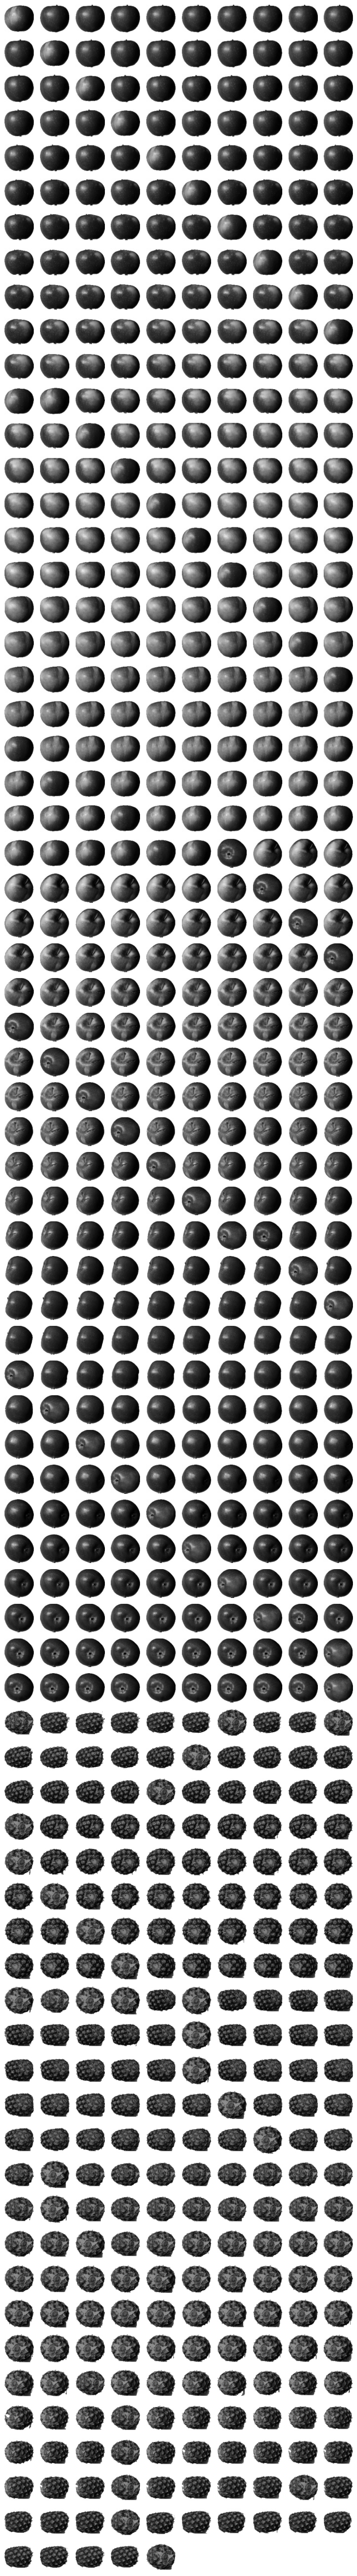

In [13]:
mask = (km.labels_ == 1) # 735 --> 사과 + 파인애플
#cluster01= km.labels_[mask]
draw_fruits(fruits[mask])

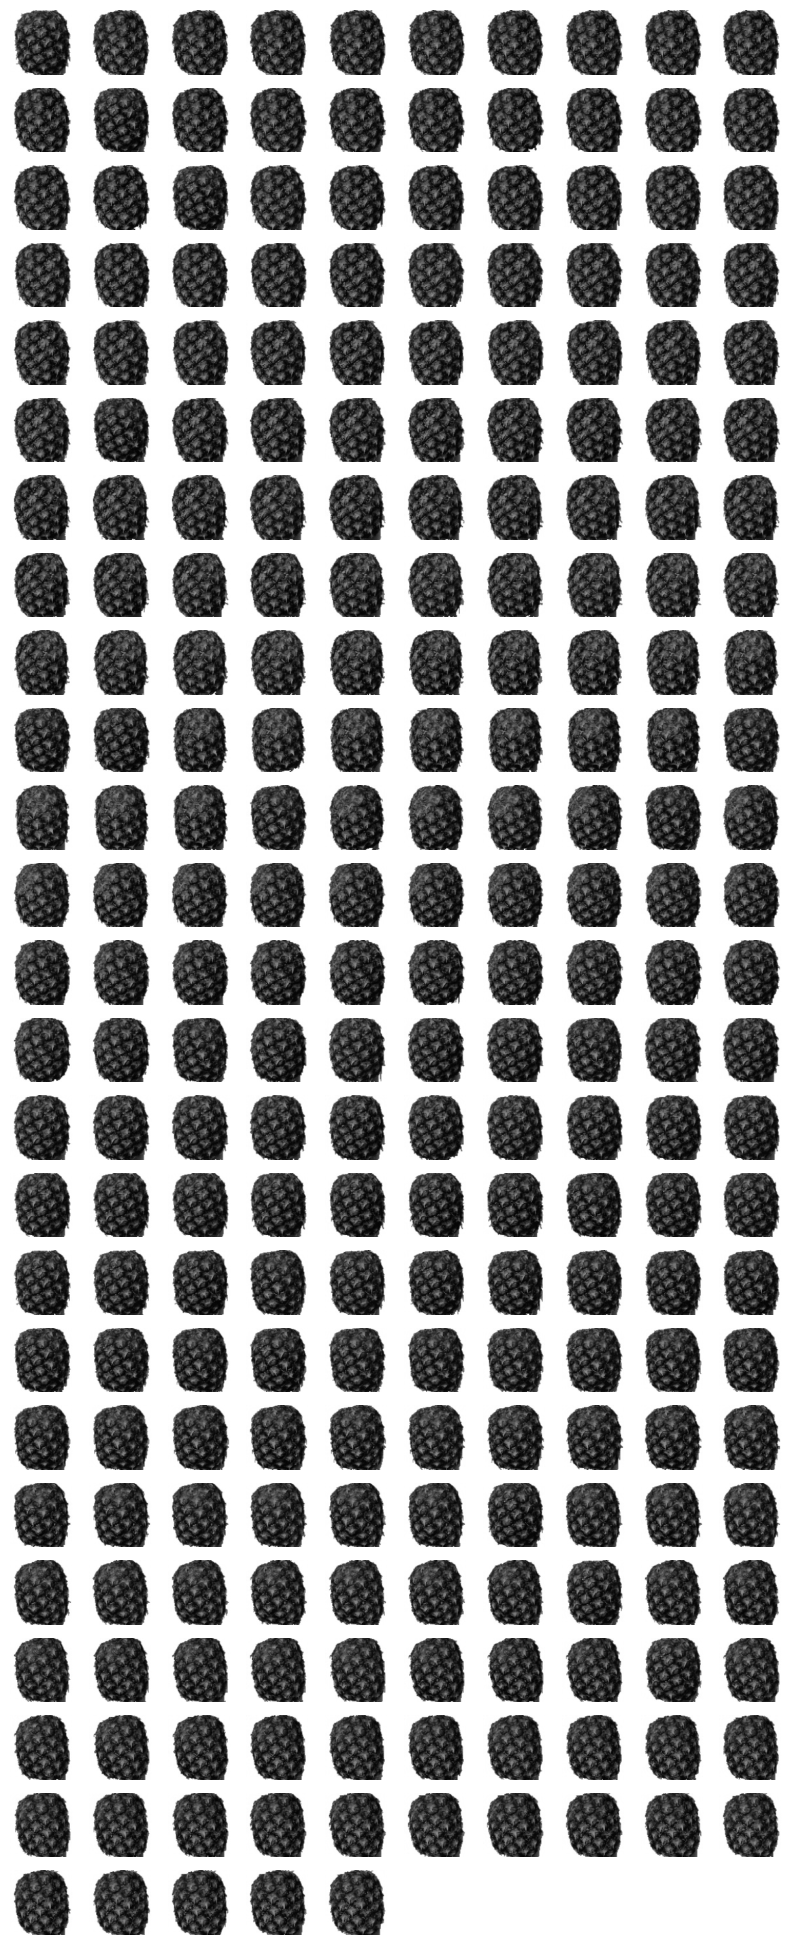

In [14]:
mask = (km.labels_ == 2) # 245 --> 파인애플
#cluster2 = km.labels_[mask]
draw_fruits(fruits[mask])

In [11]:
'''
c0 = fruits_2d[cluster0].reshape(-1, 100, 100)
c1 = fruits_2d[cluster1].reshape(-1, 100, 100)
c2 = fruits_2d[cluster2].reshape(-1, 100, 100)
'''

In [12]:
'''
print(c0.shape)
print(c1.shape)
print(c2.shape)
'''

(735, 100, 100)
(490, 100, 100)
(245, 100, 100)


### **Chapter 03. 클러스터 중심**

In [16]:
# cluster centers = centroid
print(km.cluster_centers_)
print(km.cluster_centers_.shape) # (개수, )

[[0.12244898 0.1755102  0.61836735 ... 0.         0.         0.        ]
 [0.99455782 0.80952381 0.68979592 ... 0.         0.         0.        ]
 [0.77142857 0.67755102 0.3755102  ... 0.         0.         0.        ]]
(3, 10000)


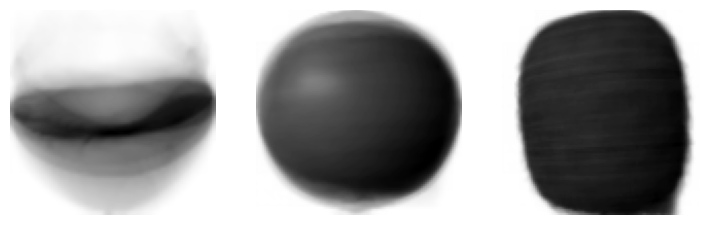

In [17]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [22]:
print(fruits_2d.shape)
print(fruits_2d[0].shape) # index --> 1-D vector

# 방법 1
print(fruits_2d[0].reshape(1, 10000).shape) # 2-D array

# 방법 2
print(fruits_2d[0:1].shape) # scliding --> 2-D array

(1470, 10000)
(10000,)
(1, 10000)
(1, 10000)


In [24]:
# 어떤 샘플과 클러스터 중심 사이(들) 사이의 거리 값을 계산해서 반환
km.transform(fruits_2d[0:1]) # 2-D 배열을 기대함

array([[11813.39838108,  4012.56512913,  8280.55337682]])

In [26]:
print(km.predict(fruits_2d[0:1])) # 2-D 배열을 기대함

[1]


In [27]:
print(np.unique(km.labels_))

[0 1 2]


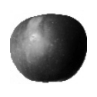

In [28]:
draw_fruits(fruits_2d[0:1].reshape(-1, 100, 100))

In [29]:
# The number of iterations --> 반복 횟수
km.n_iter_

5

### **Chapter 04. 최적의 k 찾기**

In [31]:
inertia = []
for k in range(2, 7, 1):
    #print(k)
    km = KMeans(n_clusters=k, init="random", random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [32]:
print(inertia)

[35042295924.68777, 28439337941.653057, 24531031945.910187, 20900894721.096397, 18820022664.770184]


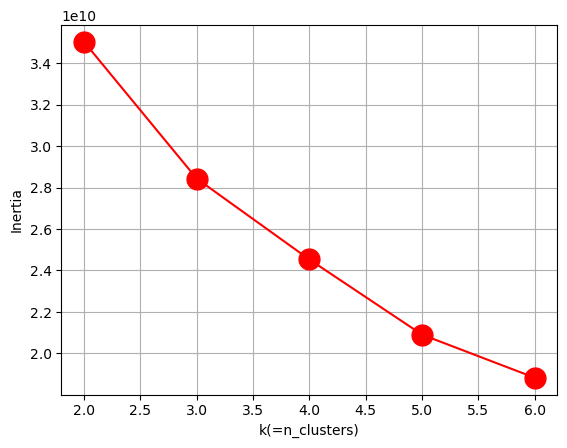

In [34]:
plt.figure()

plt.plot(range(2, 7, 1), inertia, color="red", marker='o', markersize=15)
plt.xlabel("k(=n_clusters)")
plt.ylabel("Inertia")
plt.grid()

plt.show()